In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Online Payments Fraud Detection Dataset

## 1. Problem Definition
Goal: Online payment fraud big dataset for testing and practice purpose

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Online Payments Fraud Detection Dataset.csv")

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Exploratory DataAnalysis

isFraud

In [ ]:
data["isFraud"].value_counts().to_frame()

,isFraud
0,6354407
1,8213


In [ ]:
data["isFraud"].value_counts(normalize = True).to_frame()

,isFraud
0,0.998709
1,0.001291


Type


In [ ]:
data["type"].value_counts(normalize = True).to_frame()

,type
CASH_OUT,0.351663
PAYMENT,0.338146
CASH_IN,0.219923
TRANSFER,0.083756
DEBIT,0.006512


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

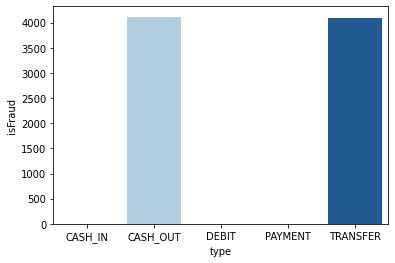

In [ ]:
dt=pd.DataFrame(data.groupby(by=data['type'])['isFraud'].sum())
sns.barplot(data=dt,x=dt.index, y='isFraud', palette ="Blues")

- Top 10 khách hàng giàu nhất bị mất nhiều tiền nhất do gian lận

In [ ]:
dta=data.loc[data['isFraud']==1,['nameOrig','oldbalanceOrg','newbalanceOrig']]
dta['loss_from_fraud']=dta['oldbalanceOrg']-dta['newbalanceOrig']
dta1=dta.sort_values(by=['loss_from_fraud','oldbalanceOrg'],ascending=False)
dta1.head(10)

,nameOrig,oldbalanceOrg,newbalanceOrig,loss_from_fraud
6266405,C794290057,42542664.27,32542664.27,10000000.0
6357390,C671111468,37418265.31,27418265.31,10000000.0
5563707,C1421664654,34892193.09,24892193.09,10000000.0
6010857,C1295280435,23752520.60,13752520.60,10000000.0
6168495,C292642955,23576297.10,13576297.10,10000000.0
6074073,C315155195,22625132.51,12625132.51,10000000.0
6014709,C524119157,19228514.10,9228514.10,10000000.0
5563723,C1074619527,19110884.44,9110884.44,10000000.0
5996399,C40489106,59585040.37,49585040.37,10000000.0
6362452,C726730575,57316255.05,47316255.05,10000000.0


- 10 người nhận được nhiều tiền nhất khi gian lận xảy ra

In [ ]:
dta=data.loc[data['isFraud']==1,['nameDest', 'oldbalanceDest', 'newbalanceDest']]
dta['gain_from_fraud']=dta['newbalanceDest']-dta['oldbalanceDest']
dta2=dta.sort_values(by=['gain_from_fraud','newbalanceDest'],ascending=False)
dta2.head(10)

,nameDest,oldbalanceDest,newbalanceDest,gain_from_fraud
4645693,C1741955070,258747.84,15173859.31,14915111.47
4525881,C562081008,1342360.08,14782044.54,13439684.46
6061826,C2059078386,11656587.57,21656587.57,10000000.00
6074074,C150091086,6070888.20,16070888.20,10000000.00
6205436,C427067936,5859505.54,15859505.54,10000000.00
6351220,C779798347,3485891.28,13485891.28,10000000.00
6362507,C635621973,2571402.25,12571402.25,10000000.00
6361722,C1023840891,2517892.18,12517892.18,10000000.00
5990225,C1786144514,2423749.18,12423749.18,10000000.00
5967443,C1012340770,2265793.36,12265793.36,10000000.00


# Feature Selection

## 2. Choose features to train ML model

In [ ]:
features = ["type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [ ]:
#transform the categorical into numeric
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


## 3. Splitting the datasets
3.1 Dataset: X, y

- data: datasets
- X : data[features]
- Y : target variable isFraud

3.2 X, y -> X_train, y_train, X_valid, y_valid

In [ ]:
X = data[features]
y = data["isFraud"]

In [ ]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,2,9839.64,170136.0,160296.36,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,2,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
y.head()

0    No Fraud
1    No Fraud
2       Fraud
3       Fraud
4    No Fraud
Name: isFraud, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(5090096, 6)

In [ ]:
X.shape

(6362620, 6)

In [ ]:
data.shape

(6362620, 11)

In [ ]:
X_valid.shape

(1272524, 6)

## 4. Training Machine Learning Model

In [ ]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)

In [ ]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [ ]:
y_preds = dt_model.predict(X_valid.head())

In [ ]:
y_preds

array(['No Fraud', 'No Fraud', 'No Fraud', 'No Fraud', 'No Fraud'],
      dtype=object)

In [ ]:
pd.DataFrame({'y':y_valid.head(), 'y_preds':y_preds })

,y,y_preds
4644207,No Fraud,No Fraud
3800666,No Fraud,No Fraud
4426240,No Fraud,No Fraud
5788765,No Fraud,No Fraud
2010701,No Fraud,No Fraud


In [ ]:
features = np.array([[4, 2000.60, 9000.60, 0.0, 7300.0, 0.0]])
print(dt_model.predict(features))

['No Fraud']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

